<a href="https://colab.research.google.com/github/BLong1501/Bao-Long/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#bai 01
from typing import Counter
import pandas as pd
import numpy as np
f = 'https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv'
df = pd.read_csv(f, sep="\t")
#step1
print(df.head(10))
df.shape[0]
df.shape[1]
df.columns
df.index
most_ordered = (df.groupby('item_name')['quantity'].sum().idxmax())
#step10
most_ordered_count = (df.groupby('item_name')['quantity'].sum().max())

#step11
choice_description = df.groupby('choice_description')['quantity'].sum().idxmax()
#step 12
total_items_order = df['quantity'].sum()
print(total_items_order)

print()

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [13]:
#bai 00
import pandas as pd
dic_pkm = { 'evolution' :['Ivysaur','Charmeleon','Wartortle','Metapod'],
            'hp':[45,39,44,45],
            'name':['Metapod','Charmander','Squirtle','Caterpie'],
            'pokedex':['yes','no','yes','no'],
            'type':['grass','fire','water','bug']}
pokemon = pd.DataFrame(dic_pkm)
pokemon  = pokemon[['name','type','hp','evolution','pokedex']]
pokemon['place'] = None
print(pokemon.dtypes)

name         object
type         object
hp            int64
evolution    object
pokedex      object
place        object
dtype: object


In [32]:
#bai 02
import pandas as pd
import numpy as np

path = 'https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/chipotle.tsv'
chipo = pd.read_csv(path, sep='\t')
# print(chipo.head())
#step4
chipo['item_price'] = chipo['item_price'].str.replace('$','').astype(float)
step4 = chipo[chipo['item_price']>10.00]
step4.shape[0]
#step5
step5 = chipo.groupby('item_name')['item_price']
# print(step5)
#step6
step6 = chipo.sort_values('item_name')
step6
#step 7
step7 = chipo['item_price'].max()
step7
#step 8
step8 = chipo[chipo['item_name']=='Veggie Salad Bowl']
step8 = step8['quantity'].sum()
# print(step8)
#step9
step9 = chipo[(chipo['item_name']== "Canned Soda") & (chipo['quantity']>1)]
step9 = step9['quantity'].shape[0]
step9

20

In [38]:
#bai 03
# Step 1: Đọc dữ liệu từ file
data = pd.read_csv(
    "https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/wind.data",
    sep="\s+"
)

# Step 2: Tạo cột datetime từ 3 cột đầu
data["date"] = pd.to_datetime(data[["Yr", "Mo", "Dy"]].rename(columns={"Yr": "year", "Mo": "month", "Dy": "day"}))

# Step 3: Đặt cột date làm index
data.set_index("date", inplace=True)

# Step 4: Sửa lỗi năm 2061 → 1961
def fix_year(x):
    year = x.year - 100 if x.year > 2025 else x.year
    return pd.Timestamp(year, x.month, x.day)

data.index = data.index.map(fix_year)

# Step 5: Kiểm tra kiểu dữ liệu index
print("Kiểu dữ liệu index:", data.index.dtype)  # Kết quả: datetime64[ns]

# Step 6: Tính số giá trị thiếu ở mỗi trạm
missing_values = data.isnull().sum()
print("Số giá trị thiếu ở mỗi trạm:\n", missing_values)

# Step 7: Tính tổng số giá trị không bị thiếu
total_non_missing = data.notnull().sum().sum()
print("Tổng số giá trị không bị thiếu:", total_non_missing)


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3590581123.py:5: SyntaxWarning: invalid escape sequence '\s'
  sep="\s+"


ValueError: cannot assemble the datetimes: time data "610101" doesn't match format "%Y%m%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [43]:
#bai 04
import pandas as pd
import numpy as np

path = 'https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/u.user'
users = pd.read_csv(path, sep='|')
users.head()

#step 5
step5 = users.groupby('occupation')['age'].mean()
step5
#step6
step6 = users.groupby('occupation')['age'].agg(['min','max'])
step6
#step7
step7 = users.groupby(['occupation','gender'])['age'].mean()
step7
#step8
total_by_occupation = users.groupby("occupation")["gender"].count()
female_by_occupation = users[users["gender"] == "F"].groupby("occupation")["gender"].count()
gender_percent = pd.DataFrame()
gender_percent["% female"] = (female_by_occupation / total_by_occupation * 100).round(1)
gender_percent["% male"] = 100 - gender_percent["% female"]
print(gender_percent)


               % female  % male
occupation                     
administrator      45.6    54.4
artist             46.4    53.6
doctor              NaN     NaN
educator           27.4    72.6
engineer            3.0    97.0
entertainment      11.1    88.9
executive           9.4    90.6
healthcare         68.8    31.2
homemaker          85.7    14.3
lawyer             16.7    83.3
librarian          56.9    43.1
marketing          38.5    61.5
none               44.4    55.6
other              34.3    65.7
programmer          9.1    90.9
retired             7.1    92.9
salesman           25.0    75.0
scientist           9.7    90.3
student            30.6    69.4
technician          3.7    96.3
writer             42.2    57.8


In [44]:

#bai 05
# Step 1: Import thư viện
import pandas as pd

# Step 2 & 3: Đọc dữ liệu và gán vào biến crime
crime = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/US_Crime_Rates_1960_2014.csv")

# Step 4: Kiểm tra kiểu dữ liệu các cột
print("Kiểu dữ liệu ban đầu:\n", crime.dtypes)

# Step 5: Chuyển cột Year sang kiểu datetime64
crime["Year"] = pd.to_datetime(crime["Year"], format="%Y")

# Step 6: Đặt cột Year làm index
crime.set_index("Year", inplace=True)

# Step 7: Xóa cột Total
crime.drop(columns=["Total"], inplace=True)

# Step 8: Nhóm theo thập kỷ và tính tổng (trừ Population)
# Tạo cột thập kỷ
crime["Decade"] = (crime.index.year // 10) * 10

# Tính tổng các cột trừ Population
crime_sum = crime.drop(columns=["Population"]).groupby(crime["Decade"]).sum()

# Step 9: Tìm thập kỷ nguy hiểm nhất (tổng tội cao nhất)
dangerous_decade = crime_sum.sum(axis=1).idxmax()
print("Thập kỷ nguy hiểm nhất để sống ở Mỹ là:", dangerous_decade)


Kiểu dữ liệu ban đầu:
 Year                  int64
Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object
Thập kỷ nguy hiểm nhất để sống ở Mỹ là: 1990


In [46]:
#bai 06

import pandas as pd
# Step 2: Tạo dữ liệu thô
raw_data_1 = {
    'subject_id': ['1', '2', '3', '4', '5'],
    'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
    'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']
}

raw_data_2 = {
    'subject_id': ['4', '5', '6', '7', '8'],
    'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
    'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']
}

raw_data_3 = {
    'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
    'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]
}

# Step 3: Tạo các DataFrame
data1 = pd.DataFrame(raw_data_1)
data2 = pd.DataFrame(raw_data_2)
data3 = pd.DataFrame(raw_data_3)

# Step 4: Nối data1 và data2 theo hàng
all_data = pd.concat([data1, data2], ignore_index=True)

# Step 5: Nối data1 và data2 theo cột
all_data_col = pd.concat([data1, data2], axis=1)

# Step 6: In data3
print("Data3:\n", data3)

# Step 7: Merge all_data với data3 theo subject_id
merged_all = pd.merge(all_data, data3, on="subject_id", how="inner")
print("Merged all_data + data3:\n", merged_all)

# Step 8: Merge chỉ các dòng có subject_id giống nhau giữa data1 và data2
common_merge = pd.merge(data1, data2, on="subject_id", how="inner")
print("Common subject_id in data1 & data2:\n", common_merge)

# Step 9: Merge toàn bộ data1 và data2, giữ lại các dòng khớp nếu có
full_merge = pd.merge(data1, data2, on="subject_id", how="outer")
print("Full outer merge of data1 & data2:\n", full_merge)

Data3:
   subject_id  test_id
0          1       51
1          2       15
2          3       15
3          4       61
4          5       16
5          7       14
6          8       15
7          9        1
8         10       61
9         11       16
Merged all_data + data3:
   subject_id first_name last_name  test_id
0          1       Alex  Anderson       51
1          2        Amy  Ackerman       15
2          3      Allen       Ali       15
3          4      Alice      Aoni       61
4          5     Ayoung   Atiches       16
5          4      Billy    Bonder       61
6          5      Brian     Black       16
7          7      Bryce     Brice       14
8          8      Betty    Btisan       15
Common subject_id in data1 & data2:
   subject_id first_name_x last_name_x first_name_y last_name_y
0          4        Alice        Aoni        Billy      Bonder
1          5       Ayoung     Atiches        Brian       Black
Full outer merge of data1 & data2:
   subject_id first_name_x last_n

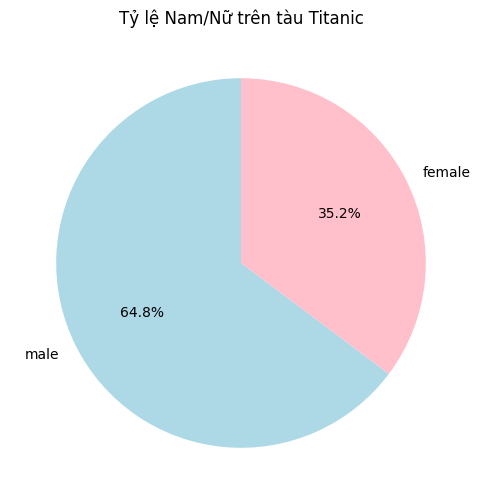

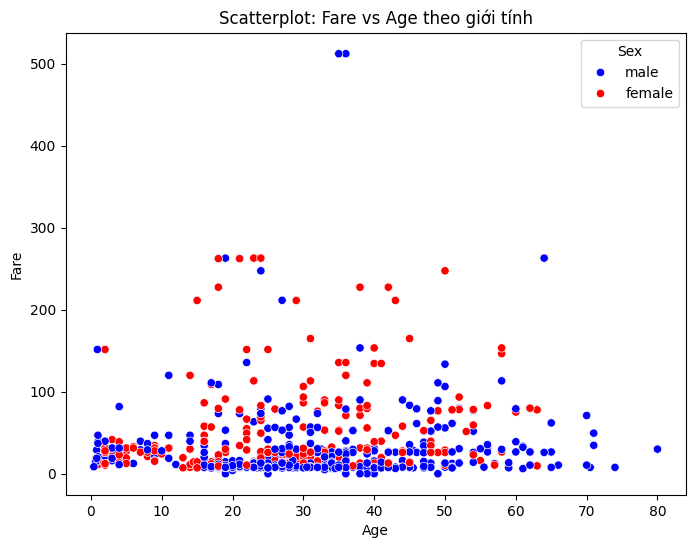

Số người sống sót: 342


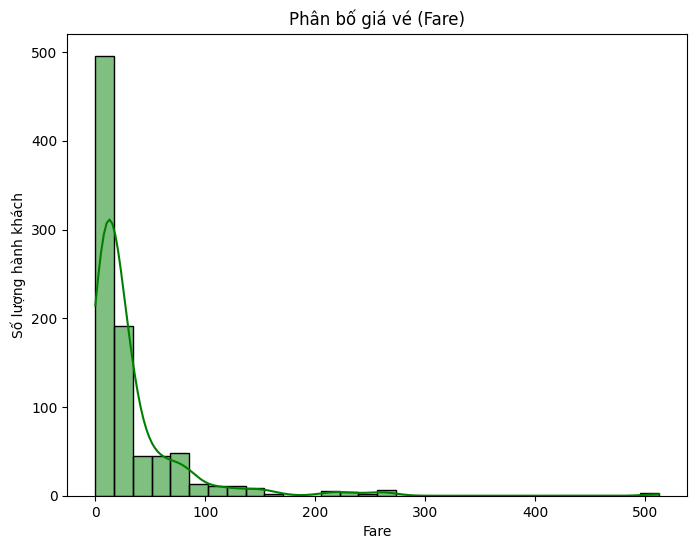

Tỷ lệ sống sót theo giới tính:
 Sex
female    0.74
male      0.19
Name: Survived, dtype: float64


In [47]:
#bai 07

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2 & 3: Đọc dữ liệu và gán vào biến titanic
titanic = pd.read_csv("https://raw.githubusercontent.com/thieu1995/csv-files/main/data/pandas/titanic_train.csv")

# Step 4: Đặt PassengerId làm index
titanic.set_index("PassengerId", inplace=True)

# Step 5: Vẽ biểu đồ tròn tỷ lệ nam/nữ
gender_counts = titanic["Sex"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=90, colors=["lightblue", "pink"])
plt.title("Tỷ lệ Nam/Nữ trên tàu Titanic")
plt.show()

# Step 6: Vẽ scatterplot giữa Fare và Age, phân màu theo giới tính
plt.figure(figsize=(8,6))
sns.scatterplot(data=titanic, x="Age", y="Fare", hue="Sex", palette={"male":"blue", "female":"red"})
plt.title("Scatterplot: Fare vs Age theo giới tính")
plt.show()

# Step 7: Số người sống sót
survived_count = titanic["Survived"].sum()
print("Số người sống sót:", survived_count)

# Step 8: Vẽ histogram của Fare
plt.figure(figsize=(8,6))
sns.histplot(titanic["Fare"], bins=30, kde=True, color="green")
plt.title("Phân bố giá vé (Fare)")
plt.xlabel("Fare")
plt.ylabel("Số lượng hành khách")
plt.show()

# BONUS: Tỷ lệ sống sót theo giới tính
survival_by_gender = titanic.groupby("Sex")["Survived"].mean().round(2)
print("Tỷ lệ sống sót theo giới tính:\n", survival_by_gender)

In [1]:


# Step 1: Import thư viện
import pandas as pd
import numpy as np

# Step 2 & 3: Đọc dữ liệu và gán vào biến wine
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
wine = pd.read_csv(url, header=None)

# Step 4: Xóa các cột: 0, 3, 6, 8, 10, 12, 13 (theo chỉ số 0-based)
wine.drop(columns=[0, 3, 6, 8, 10, 12, 13], inplace=True)

# Step 5: Gán tên cột
wine.columns = [
    "alcohol",
    "malic_acid",
    "alcalinity_of_ash",
    "magnesium",
    "flavanoids",
    "proanthocyanins",
    "hue"
]

# Step 6: Gán NaN cho 3 dòng đầu của alcohol
wine.loc[0:2, "alcohol"] = np.nan

# Step 7: Gán NaN cho dòng 3 và 4 của magnesium
wine.loc[2:3, "magnesium"] = np.nan

# Step 8: Điền NaN bằng giá trị cụ thể
wine["alcohol"].fillna(10, inplace=True)
wine["magnesium"].fillna(100, inplace=True)

# Step 9: Đếm số lượng giá trị thiếu
missing_count = wine.isnull().sum().sum()
print("Tổng số giá trị thiếu:", missing_count)

# Step 10: Tạo mảng 10 số ngẫu nhiên từ 0 đến 9
random_indices = np.random.randint(0, 10, size=10)

# Step 11: Gán NaN cho các dòng ngẫu nhiên ở cột hue
wine.loc[random_indices, "hue"] = np.nan

# Step 12: Đếm lại số giá trị thiếu
print("Tổng số giá trị thiếu sau khi gán thêm:", wine.isnull().sum().sum())

# Step 13: Xóa các dòng có giá trị thiếu
wine_cleaned = wine.dropna()

# Step 14: In các giá trị không bị thiếu ở cột alcohol
print("Alcohol không bị thiếu:\n", wine_cleaned["alcohol"])

# Step 15: Reset lại index
wine_cleaned.reset_index(drop=True, inplace=True)

# BONUS: Tính trung bình flavanoids theo từng mức hue (sau khi loại bỏ NaN)
bonus_result = wine_cleaned.groupby(pd.cut(wine_cleaned["hue"], bins=3))["flavanoids"].mean()
print("Trung bình flavanoids theo nhóm hue:\n", bonus_result)

Tổng số giá trị thiếu: 0
Tổng số giá trị thiếu sau khi gán thêm: 7
Alcohol không bị thiếu:
 1      10.00
7      14.06
9      13.86
10     14.10
11     14.12
       ...  
173    13.71
174    13.40
175    13.27
176    13.17
177    14.13
Name: alcohol, Length: 171, dtype: float64
Trung bình flavanoids theo nhóm hue:
 hue
(0.479, 0.89]    1.262419
(0.89, 1.3]      2.417700
(1.3, 1.71]      2.200000
Name: flavanoids, dtype: float64


/tmp/ipython-input-3040041423.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wine["alcohol"].fillna(10, inplace=True)
/tmp/ipython-input-3040041423.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd